In [ ]:
# metamarkers

In [4]:
library(data.table)
library(dplyr)
library(ggplot2)
library(MetaMarkers)
library(ggtern)

In [1]:
# marker ranks for all genes, FC threshold >= 1.5
meta_markers = read.delim('A1N2_metamarkers.csv', sep = ',')
meta_markers[1:2,]

group cell_type      rank gene  recurrence auroc     fold_change
1 all   Ascl1_positive 1    Ascl1 11         0.8837390 9.400003   
2 all   Ascl1_positive 2    Npas3 10         0.6022179 3.840082   
  fold_change_detection expression precision ⋯ govek hamed la_manno marcy scala
1 5.255926              273.6851   0.8877423 ⋯ TRUE  TRUE  TRUE      TRUE TRUE 
2 1.612817              266.6898   0.8136189 ⋯ TRUE  TRUE  TRUE     FALSE TRUE 
  steuernagel tasic yao_cell yao_nature zeisel
1 TRUE        TRUE  TRUE     TRUE       TRUE  
2 TRUE        TRUE  TRUE     TRUE       TRUE

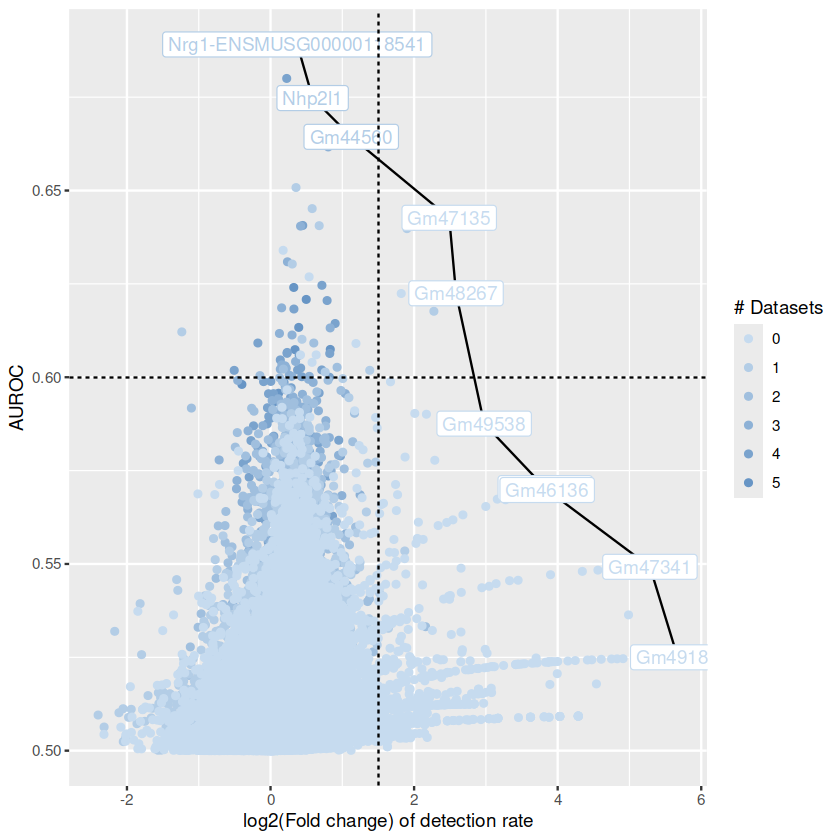

In [5]:
plotdf = meta_markers[meta_markers$gene!='Neurog2',]
plot_pareto_markers(plotdf, "double_positive", min_recurrence = 0, fc_threshold = 1.5, auroc_threshold = 0.6)

In [6]:
# dfs for each cell type
tab1 = meta_markers[meta_markers$cell_type=='double_positive',]
tab2 = meta_markers[meta_markers$cell_type=='Neurog2_positive',]
tab3 = meta_markers[meta_markers$cell_type=='Ascl1_positive',]

head(tab1, n = 20)

group cell_type       rank gene          recurrence auroc    
124263 all   double_positive  1   Neurog2       11         0.9042953
124264 all   double_positive  2   Cacna2d1       5         0.6240437
124265 all   double_positive  3   Rasgef1b       5         0.6208366
124266 all   double_positive  4   Nefl           5         0.6133472
124267 all   double_positive  5   Myo1b          5         0.6074479
124268 all   double_positive  6   Lingo1         5         0.6073891
124269 all   double_positive  7   Slit3          5         0.5980726
124270 all   double_positive  8   Sorbs2         5         0.5957226
124271 all   double_positive  9   Ajap1          5         0.5934267
124272 all   double_positive 10   Plxnd1         5         0.5913307
124273 all   double_positive 11   Cracdl         4         0.6800151
124274 all   double_positive 12   Epha4          4         0.6406443
124275 all   double_positive 13   Lhx2           4         0.6246185
124276 all   double_positive 14   B230216N24Rik  4         0.6205395
124277 all   double_positive 15   Nedd4l         4         0.6182673
124278 all   double_positive 16   Emx1           4         0.6143971
124279 all   double_positive 17   Rtn4rl1        4         0.6091657
124280 all   double_positive 18   Cyp46a1        4         0.6066390
124281 all   double_positive 19   Atp2b2         4         0.6063977
124282 all   double_positive 20   Nrn1           4         0.6063638
       fold_change fold_change_detection expression precision  ⋯ govek hamed
124263 9.9277076   11.0837631            166.65133  0.25241394 ⋯  TRUE  TRUE
124264        NA    1.2515454                   NA  0.08229239 ⋯ FALSE FALSE
124265        NA    1.4118371                   NA  0.09014099 ⋯ FALSE FALSE
124266 1.3955352    1.3131198             82.66364  0.07879787 ⋯ FALSE  TRUE
124267 1.5096993    1.7806400             50.76413  0.03959158 ⋯ FALSE    NA
124268 1.4025631    1.2667001            146.07637  0.08161828 ⋯ FALSE  TRUE
124269 0.9655486    0.7583770              0.00000  0.08511201 ⋯ FALSE  TRUE
124270 1.3928534    1.0811522            271.57555  0.07549575 ⋯ FALSE FALSE
124271 1.2633525    1.0392625              0.00000  0.08808275 ⋯ FALSE  TRUE
124272 1.2487772    1.1097412              0.00000  0.08753701 ⋯ FALSE  TRUE
124273 1.4786920    1.1690697             43.16306  0.01869066 ⋯ FALSE    NA
124274        NA    1.3646295            329.27914  0.08758718 ⋯ FALSE FALSE
124275        NA    1.6426007            149.25655  0.08959818 ⋯ FALSE FALSE
124276 2.1275241    1.7268494              0.00000          NA ⋯    NA    NA
124277 1.3314785    1.2534311            171.24928  0.03556473 ⋯ FALSE    NA
124278        NA    1.8662688              0.00000  0.11532669 ⋯ FALSE FALSE
124279 0.9812218    0.8850316              0.00000  0.07522840 ⋯ FALSE FALSE
124280 1.1966861    1.1748219             37.98369  0.03649646 ⋯ FALSE    NA
124281 1.8649782    1.1730620            250.31807  0.08297427 ⋯ FALSE  TRUE
124282        NA    1.7715775            272.98493  0.09415404 ⋯ FALSE FALSE
       la_manno marcy scala steuernagel tasic yao_cell yao_nature zeisel
124263  TRUE     TRUE  TRUE  TRUE        TRUE TRUE      TRUE       TRUE 
124264 FALSE     TRUE FALSE  TRUE        TRUE TRUE     FALSE      FALSE 
124265 FALSE     TRUE  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
124266 FALSE    FALSE FALSE  TRUE        TRUE TRUE      TRUE      FALSE 
124267 FALSE    FALSE  TRUE  TRUE        TRUE TRUE      TRUE      FALSE 
124268 FALSE     TRUE FALSE FALSE        TRUE TRUE      TRUE      FALSE 
124269 FALSE    FALSE  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
124270 FALSE     TRUE  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
124271 FALSE    FALSE  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
124272 FALSE    FALSE  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
124273    NA       NA  TRUE    NA        TRUE TRUE      TRUE         NA 
124274 FALSE    FALSE  TRUE FALSE        TRUE TRUE      TRUE     

In [7]:
# for z-score of ranks --- heatmap
glist = unique(meta_markers$gene)
df = read.delim('A1N2_marker_zscores.csv', sep = ',')
df[1:2,]

gene  A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
1 Ascl1   921     62131   1       49.6270472      0.00000000      
2 Npas3 61731     62119   2        0.6395804      0.01918741      
  Ascl1_positive A1N2_zscore N2_zscore A1_zscore 
1 50.37295       -0.5643837  1.1546042 -0.5902205
2 99.34123        0.5719155  0.5827681 -1.1546835

In [76]:
# for z-score of ranks --- heatmap
# genes in 2 or more datasets, auroc > 0.55
allgenes = unique(meta_markers$gene)
glist = unique(meta_markers$gene[meta_markers$recurrence>=2 | meta_markers$auroc>0.55])
length(glist)

df = data.frame(gene = glist, A1N2_rank = tab1$rank[match(glist, tab1$gene)],
                N2_rank = tab2$rank[match(glist, tab2$gene)], A1_rank = tab3$rank[match(glist, tab3$gene)])

df$double_positive = 100 - (df$A1N2_rank*100/length(allgenes))
df$Neurog2_positive = 100 - (df$N2_rank*100/length(allgenes))
df$Ascl1_positive = 100 - (df$A1_rank*100/length(allgenes))

rsum = rowSums(df[,5:7], na.rm = T)

# scale for composition plot
df[,5] <- df[,5]*100/rsum
df[,6] <- df[,6]*100/rsum
df[,7] <- df[,7]*100/rsum
df[1:2,]

[1] 3968

gene  A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
1 Ascl1   921     62131   1       49.6270472      0.00000000      
2 Npas3 61731     62119   2        0.6395804      0.01918741      
  Ascl1_positive
1 50.37295      
2 99.34123

In [80]:
# colors for plotting old and new target genes?
set1 = c('Pax6', 'Cdkn1a', 'Cdkn1c', 'Nhlh1', 'Bcl11a', 'Satb2', 'Fezf2', 'Dll1')
set2 = c('Endou', 'Foxp1', 'Fmn2', 'Pygm', 'Hsd11b1', 'Thbs2', 'Nuak2', 'Scube2', 'Irx3')

df$mycol = 'others'
df$mycol[match(set1, df$gene)] = 'old'
df$mycol[match(set2, df$gene)] = 'new'

df2 = rbind(df[df$mycol=='others',], df[df$mycol=='old',], df[df$mycol=='new',])

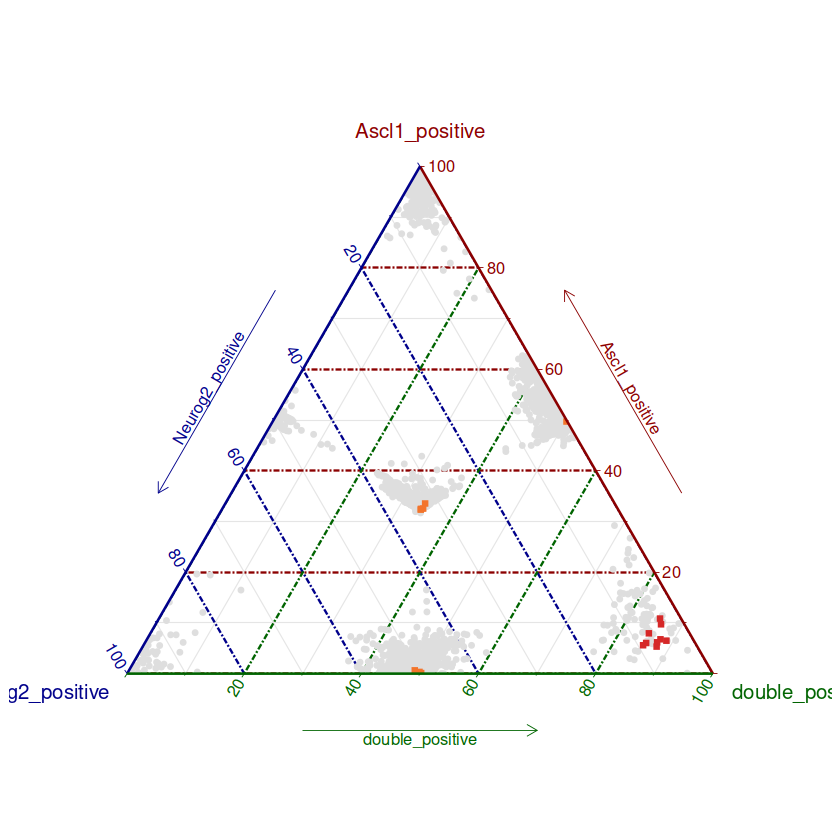

In [99]:
# pdf('aa-a1n2-ternary.pdf', width = 6, height = 5)
ggtern(df2, aes(Neurog2_positive, Ascl1_positive, double_positive, col = mycol)) +
geom_point(alpha = 1, size = 1.5, aes(shape = mycol)) + theme_rgbw() + 
scale_color_manual(values = c('#d62828', '#f3742b', '#dedede')) +
scale_shape_manual(values = c(15, 15, 20)) + theme(legend.position = 'none')
# dev.off()

In [100]:
# add recurrence in dbl-pos to df
df$recurrence_dbl_pos = tab1$recurrence[match(df$gene, tab1$gene)]
df[1:2,]

gene  A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
1 Ascl1   921     62131   1       49.6270472      0.00000000      
2 Npas3 61731     62119   2        0.6395804      0.01918741      
  Ascl1_positive mycol  recurrence_dbl_pos
1 50.37295       others 2                 
2 99.34123       others 0

In [101]:
df3 = df %>% arrange(-recurrence_dbl_pos, -double_positive)
head(df3)

gene     A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
1 Neurog2   1           1    62131   50.00000        50.00000        
2 Plxnd1   10        2083    61490   50.58301        48.89504        
3 Ajap1     9         658    61966   50.19554        49.67114        
4 Myo1b     5         700    61708   50.10970        49.54912        
5 Slit3     7         145    62084   50.03665        49.92550        
6 Cacna2d1  2          19    62127   50.00523        49.99155        
  Ascl1_positive mycol  recurrence_dbl_pos
1 0.000000000    others 11                
2 0.521944467    others  5                
3 0.133322560    others  5                
4 0.341184062    others  5                
5 0.037855296    others  5                
6 0.003219445    others  5

In [102]:
# save
write.table(df3, file = 'A1N2_genes_by_recurrence.csv', sep = ',', 
            row.names = F, col.names = T, quote = F)

In [1]:
df3 = read.delim('A1N2_genes_by_recurrence.csv', sep = ',')

In [8]:
length(df3$gene[df3$recurrence_dbl_pos>=2 & df3$double_positive>=80])
length(df3$gene[df3$recurrence_dbl_pos>=5])
length(df3$gene[df3$recurrence_dbl_pos>=5 & df3$double_positive>=80])

[1] 21

[1] 10

[1] 0

In [6]:
# list1 = df3$gene[df3$recurrence_dbl_pos>=5 | df3$double_positive>=80]
list1 = df3$gene[df3$recurrence_dbl_pos>=5]
length(list1)

[1] 10

In [9]:
df3$gene[df3$recurrence_dbl_pos>=2 & df3$double_positive>=80]
df3$gene[df3$recurrence_dbl_pos>=5]

[1] "Endou"         "Nxn"           "2310014F06Rik" "Foxp1"        
 [5] "Gm10561"       "Thbs2"         "Pygm"          "Hsd11b1"      
 [9] "Nuak2"         "Fmn2"          "Scube2"        "Gm30655"      
[13] "Irx3"          "Barx2"         "Cd80"          "Lpar6"        
[17] "C030013G03Rik" "Extl3"         "Cep128"        "Mapkapk2"     
[21] "Mb21d2"

[1] "Neurog2"  "Plxnd1"   "Ajap1"    "Myo1b"    "Slit3"    "Cacna2d1"
 [7] "Sorbs2"   "Nefl"     "Rasgef1b" "Lingo1"